<a href="https://colab.research.google.com/github/RahmanMonty/Data606Capstone/blob/main/Baltimore_Crime_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import random
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Part1_Crime_data.xlsx')


In [ ]:

df["Week"] = pd. DatetimeIndex(df['CrimeDateTime']).week
df["Day"] = pd. DatetimeIndex(df['CrimeDateTime']).day
df["Month"] = pd. DatetimeIndex(df['CrimeDateTime']).month
df["Year"] = pd. DatetimeIndex(df['CrimeDateTime']).year

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,Week,Day,Month,Year
0,1.431688e+06,604046.096242,1,2021/07/03 14:32:00+00,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN,26,3,7,2021
1,1.415386e+06,598803.710854,2,2021/07/03 05:21:54+00,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN,26,3,7,2021
2,1.413955e+06,581387.604790,3,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,26,3,7,2021
3,1.413955e+06,581387.604790,4,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,26,3,7,2021
4,1.424268e+06,586493.057063,5,2021/07/03 14:00:00+00,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN,26,3,7,2021


In [ ]:
df = df.drop(["X", "Y", "RowID", "Total_Incidents", 
                    "Shape", "GeoLocation",
                    "VRIName", "Location", "Shape", "Post"], axis = 1)
df.head()

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year
0,2021/07/03 14:32:00+00,6E,LARCENY,NaN,NaN,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,NaN,26,3,7,2021
1,2021/07/03 05:21:54+00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021
2,2021/07/03 01:37:14+00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021
3,2021/07/03 01:37:14+00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021
4,2021/07/03 14:00:00+00,6E,LARCENY,I,NaN,SOUTHERN,INNER HARBOR,39.2764,-76.6046,PARKING LOT-INSIDE,26,3,7,2021


In [ ]:
df = df[df["CrimeCode"].notna()]

df = df[df["Description"].notna()]
df = df[df["Inside_Outside"].notna()]
df = df[df["Weapon"].notna()]
# df_model = df_model[df_model["Post"].notna()]
df = df[df["District"].notna()]
df = df[df["Neighborhood"].notna()]
df = df[df["Latitude"].notna()]
df = df[df["Longitude"].notna()]
df = df[df["Premise"].notna()]


df.head()

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year
1,2021/07/03 05:21:54+00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021
2,2021/07/03 01:37:14+00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021
3,2021/07/03 01:37:14+00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021
8,2021/07/02 22:30:40+00,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,26,2,7,2021
9,2021/07/02 01:09:59+00,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,26,2,7,2021


In [ ]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], format='%Y-%m-%d')
df.head()

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year
1,2021-07-03 05:21:54+00:00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021
2,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021
3,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021
8,2021-07-02 22:30:40+00:00,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,26,2,7,2021
9,2021-07-02 01:09:59+00:00,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,26,2,7,2021


In [ ]:
df.dtypes

CrimeDateTime     datetime64[ns, UTC]
CrimeCode                      object
Description                    object
Inside_Outside                 object
Weapon                         object
District                       object
Neighborhood                   object
Latitude                      float64
Longitude                     float64
Premise                        object
Week                            int64
Day                             int64
Month                           int64
Year                            int64
dtype: object

In [ ]:
df['CrimeDateTime'] = df['CrimeDateTime'].astype('str') 

In [ ]:
df.loc[df['CrimeDateTime'].str.contains('01/'), 'T_month'] = 1
df.loc[df['CrimeDateTime'].str.contains('02/'), 'T_month'] = 2
df.loc[df['CrimeDateTime'].str.contains('03/'), 'T_month'] = 3
df.loc[df['CrimeDateTime'].str.contains('04/'), 'T_month'] = 4
df.loc[df['CrimeDateTime'].str.contains('05/'), 'T_month'] = 5
df.loc[df['CrimeDateTime'].str.contains('06/'), 'T_month'] = 6
df.loc[df['CrimeDateTime'].str.contains('07/'), 'T_month'] = 7
df.loc[df['CrimeDateTime'].str.contains('08/'), 'T_month'] = 8
df.loc[df['CrimeDateTime'].str.contains('09/'), 'T_month'] = 9
df.loc[df['CrimeDateTime'].str.contains('10/'), 'T_month'] = 10
df.loc[df['CrimeDateTime'].str.contains('11/'), 'T_month'] = 11
df.loc[df['CrimeDateTime'].str.contains('12/'), 'T_month'] = 12
df.head(5)

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year,T_month
1,2021-07-03 05:21:54+00:00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021,NaN
2,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
3,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
8,2021-07-02 22:30:40+00:00,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,26,2,7,2021,NaN
9,2021-07-02 01:09:59+00:00,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,26,2,7,2021,NaN


In [ ]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], format='%Y-%m-%d')
df.head()

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year,T_month
1,2021-07-03 05:21:54+00:00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021,NaN
2,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
3,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
8,2021-07-02 22:30:40+00:00,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,26,2,7,2021,NaN
9,2021-07-02 01:09:59+00:00,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,26,2,7,2021,NaN


In [ ]:
# df = df[df.Week != 53]
# df = df.reset_index()
# df['order'] = df.index + 1
# df.index = df.order
# series = df['count']

# # quick visualize
# plt.plot(series)

In [ ]:
# ax = Month_Count.plot.line()
# ax.set_ylabel("Crimes per day")
# ax.set_xlabel("Dates")

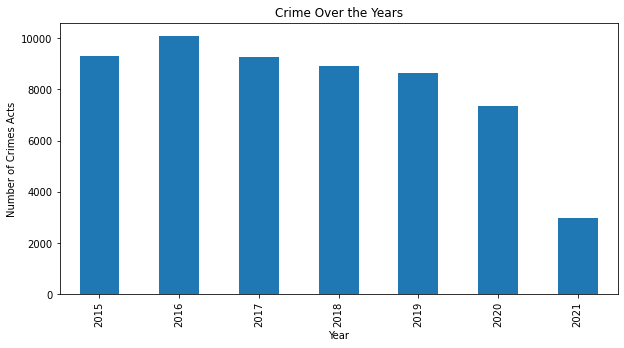

In [ ]:
df = df[df["Year"] > 2014]
plt.figure(figsize = (10,5))
x=df.groupby([df.Year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()

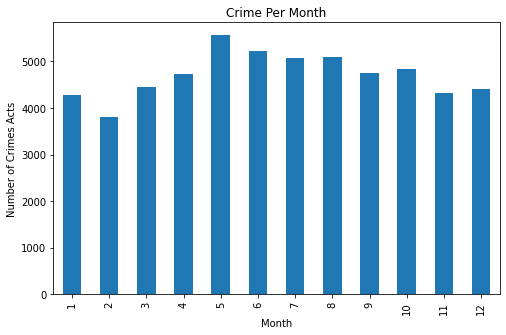

In [ ]:
plt.figure(figsize = (8,5))

df.groupby([df.Month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()

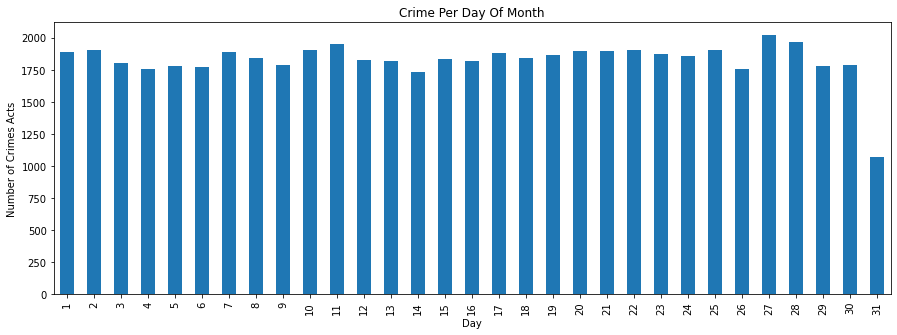

In [ ]:
plt.figure(figsize = (15,5))
df.groupby([df.Day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [ ]:
df['Description'] = pd.Categorical(df['Description'])
df.head()

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year,T_month
1,2021-07-03 05:21:54+00:00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021,NaN
2,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
3,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
8,2021-07-02 22:30:40+00:00,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,26,2,7,2021,NaN
9,2021-07-02 01:09:59+00:00,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,26,2,7,2021,NaN


In [ ]:
df.set_index('CrimeDateTime')
df.head()

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year,T_month
1,2021-07-03 05:21:54+00:00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021,NaN
2,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
3,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN
8,2021-07-02 22:30:40+00:00,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,26,2,7,2021,NaN
9,2021-07-02 01:09:59+00:00,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,26,2,7,2021,NaN


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df["CrimeCode_Encode"] = label_encoder.fit_transform(df["CrimeCode"])
df["District_Encode"] = label_encoder.fit_transform(df["District"])

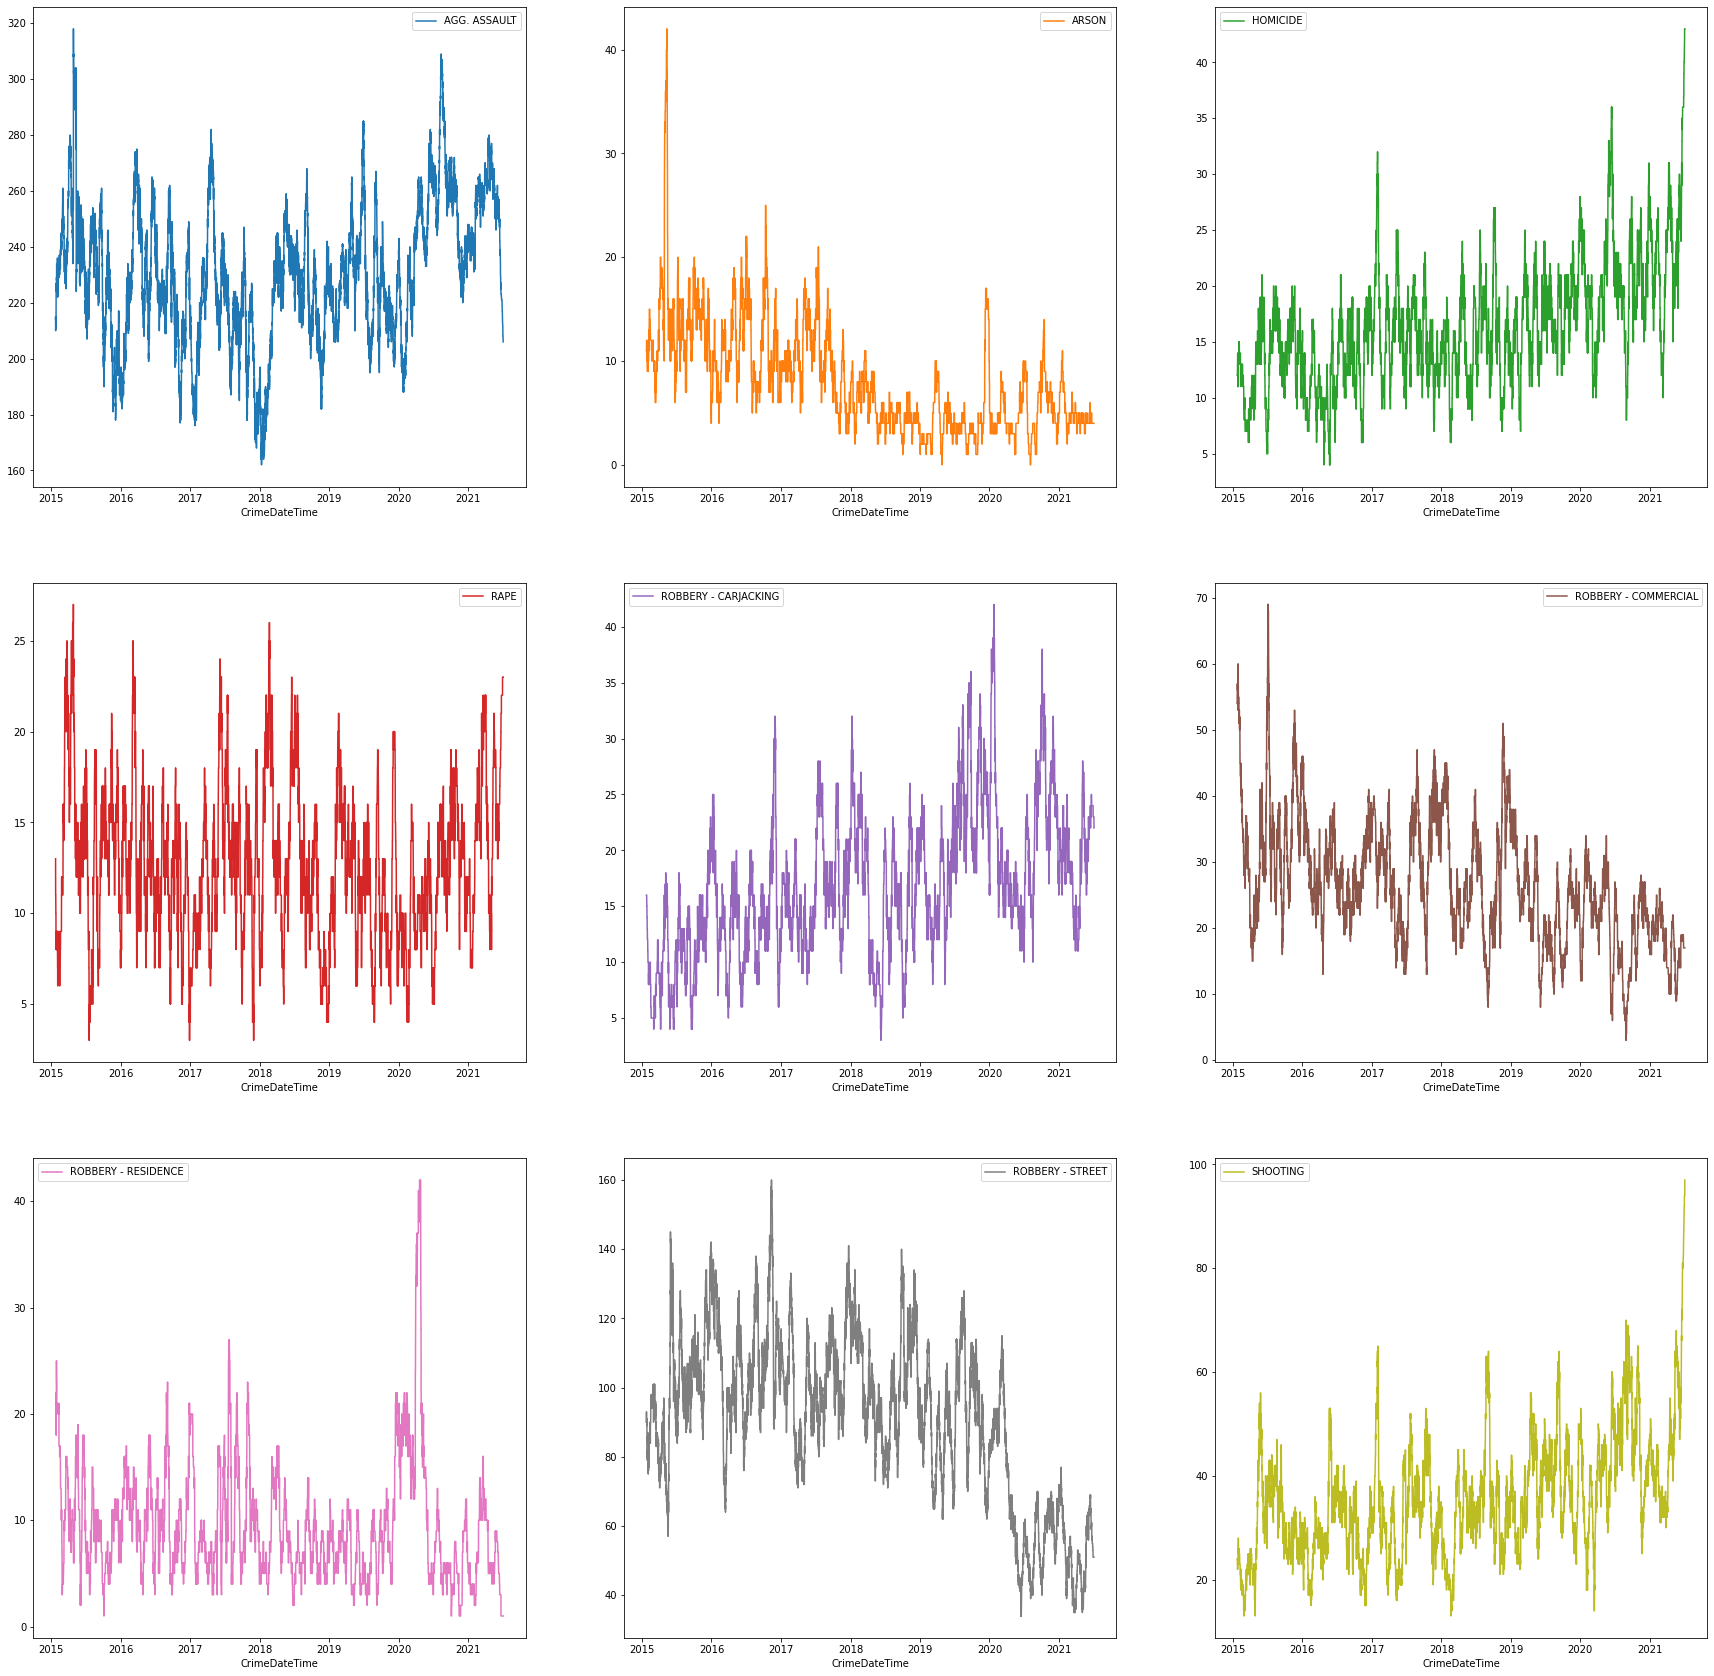

In [ ]:
crimes_count_date = df.pivot_table('CrimeCode', aggfunc=np.size, columns='Description', index = df["CrimeDateTime"], fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(30, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (1,428 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [ ]:

import geopandas as gpd
from shapely.geometry import Point, Polygon
path_geojson = '/content/Maryland_Baltimore_City_Neighborhoods.zip'
geodf = gpd.read_file(path_geojson)
geodf['LABEL'] = geodf['LABEL'].astype('str')
geodf.head(5)

,OBJECTID,NBRDESC,ACRES,LABEL,COLOR_2,geometry
0,1,ABELL,46.710432,Abell,2,"POLYGON ((1422345.337 603620.765, 1422192.136 ..."
1,2,ALLENDALE,260.023864,Allendale,2,"POLYGON ((1404989.665 592042.050, 1404989.913 ..."
2,3,ARCADIA,144.678075,Arcadia,2,"POLYGON ((1434376.830 608229.661, 1434486.755 ..."
3,4,ARLINGTON,115.584689,Arlington,5,"POLYGON ((1401059.486 612450.588, 1401004.764 ..."
4,5,ARMISTEAD GARDENS,302.585653,Armistead Gardens,2,"POLYGON ((1437179.460 597502.829, 1437145.202 ..."


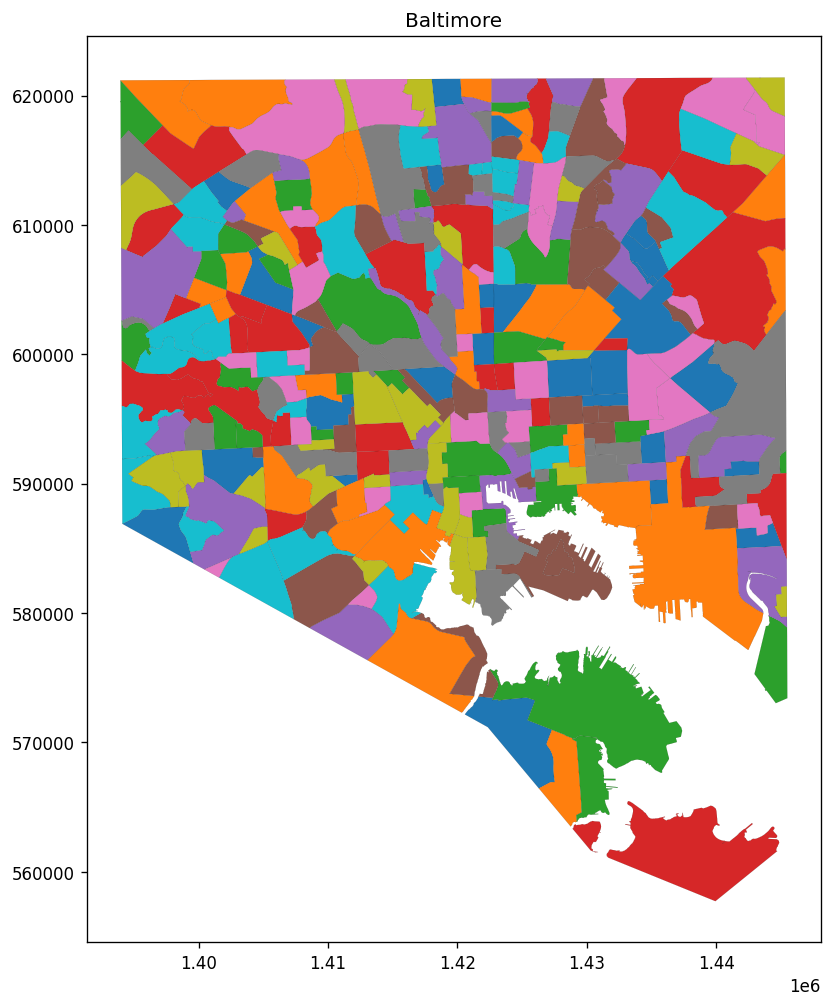

In [ ]:
ax = geodf.plot(column='LABEL',linewidth=0.05,edgecolor='black', legend=False,figsize=(10,10))
# for i, geo in geodf.centroid.iteritems():
    # ax.annotate(s=geodf['LABEL'][i], xy=[geo.x, geo.y], color="black")

    # show the subplot
    # ax.figure
plt.title('Baltimore')
plt.show();

MODEL TIME ARIMA AND SARIMA

In [ ]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [ ]:

df.head()

,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,Premise,Week,Day,Month,Year,T_month,CrimeCode_Encode,District_Encode
1,2021-07-03 05:21:54+00:00,9S,SHOOTING,Outside,FIREARM,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,STREET,26,3,7,2021,NaN,49,0
2,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN,49,6
3,2021-07-03 01:37:14+00:00,9S,SHOOTING,Outside,FIREARM,SOUTHERN,WESTPORT,39.2625,-76.6411,STREET,26,3,7,2021,NaN,49,6
8,2021-07-02 22:30:40+00:00,9S,SHOOTING,Outside,FIREARM,EASTERN,DUNBAR-BROADWAY,39.2953,-76.5913,STREET,26,2,7,2021,NaN,49,1
9,2021-07-02 01:09:59+00:00,1A,HOMICIDE,Outside,FIREARM,SOUTHERN,CARROLLTON RIDGE,39.2848,-76.6451,STREET,26,2,7,2021,NaN,0,6


In [ ]:
# Grouping data by the columns created via the datetime. (Week, Day, Month)

Month_Count = df['Month'].groupby(df.CrimeDateTime.dt.date).count()
Month_Count = Month_Count.reset_index()
Day_Count = df['Day'].groupby(df.CrimeDateTime.dt.date).count()
Day_Count = Day_Count.reset_index()
Year_Count = df['Year'].groupby(df.CrimeDateTime.dt.date).count()
Year_Count = Month_Count.reset_index()


In [ ]:


from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(Month_Count.Month.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.149658
p-value: 0.023090


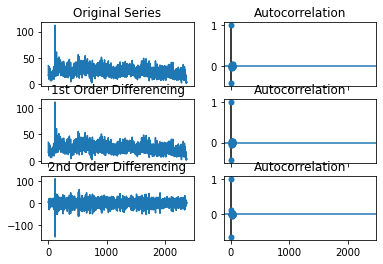

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(Month_Count.Month); axes[0, 0].set_title('Original Series')
plot_acf(Month_Count.Month.diff().dropna(), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(Month_Count.Month); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Month_Count.Month.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(Month_Count.Month.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(Month_Count.Month.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

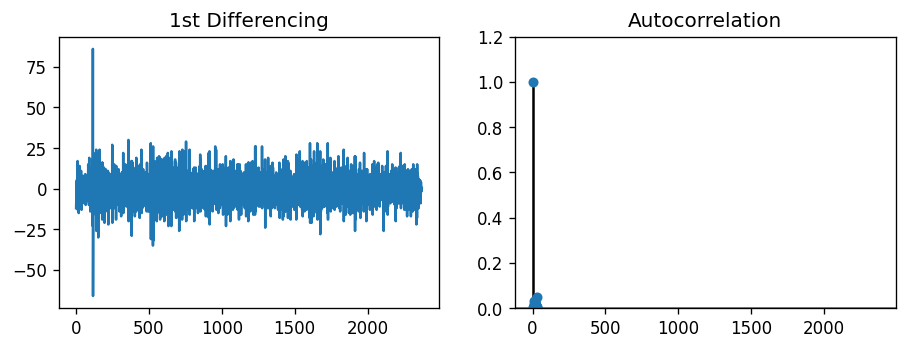

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(Month_Count.Month.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(Month_Count.Month.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
#Month_Count.Month

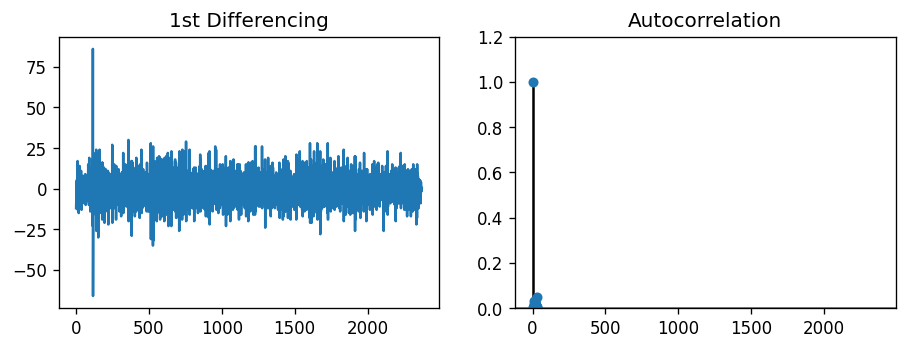

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(Month_Count.Month.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(Month_Count.Month.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Month_Count.Month, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Month   No. Observations:                 2372
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8079.028
Method:                       css-mle   S.D. of innovations              7.291
Date:                Thu, 22 Jul 2021   AIC                          16168.055
Time:                        00:03:39   BIC                          16196.913
Sample:                             1   HQIC                         16178.560
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0046      0.013     -0.365      0.715      -0.029       0.020
ar.L1.D.Month     0.3207      0.155      2.063      0.039       0.016       0.625
ma.L1.D.Month    -1.0973      0.161     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
model = ARIMA(Month_Count.Month, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Month   No. Observations:                 2372
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8079.582
Method:                       css-mle   S.D. of innovations              7.293
Date:                Thu, 22 Jul 2021   AIC                          16167.163
Time:                        00:03:39   BIC                          16190.249
Sample:                             1   HQIC                         16175.567
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0048      0.013     -0.365      0.715      -0.031       0.021
ar.L1.D.Month     0.1529      0.023      6.606      0.000       0.108       0.198
ma.L1.D.Month    -0.9258      0.010    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


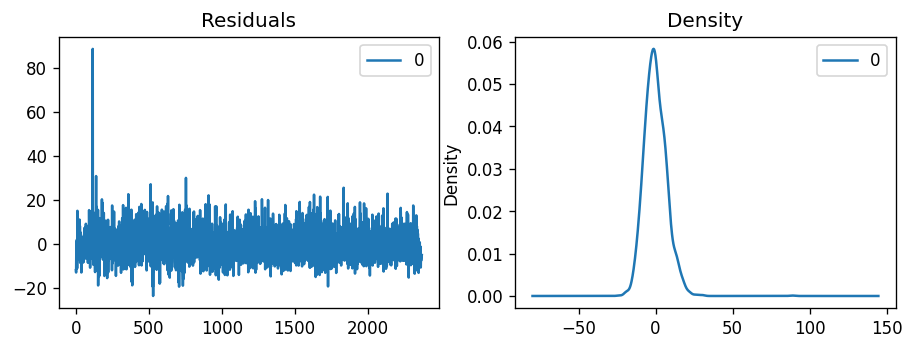

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


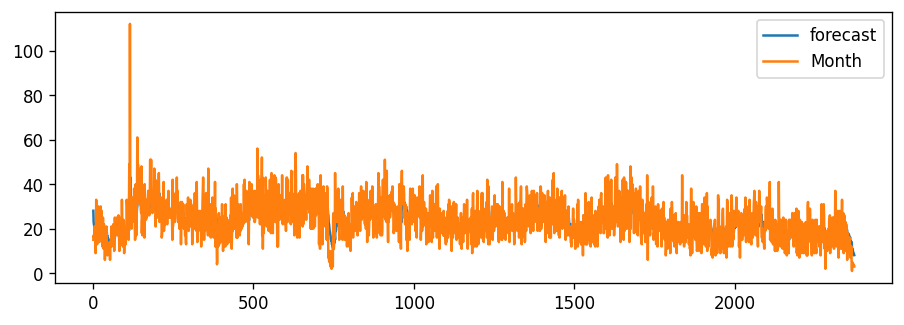

In [ ]:


model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf


train = Month_Count.Month[:85]
test = Month_Count.Month[85:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

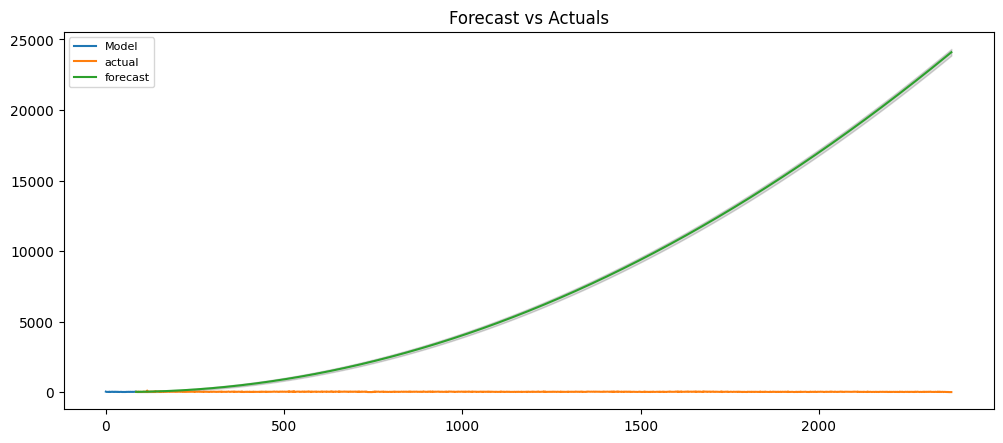

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(2288, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Model')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.Month   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -268.543
Method:                       css-mle   S.D. of innovations              5.905
Date:                Thu, 22 Jul 2021   AIC                            549.086
Time:                        00:47:29   BIC                            563.599
Sample:                             2   HQIC                           554.917
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0090      0.012      0.762      0.446      -0.014       0.032
ar.L1.D2.Month    -0.5895      0.111     -5.313      0.000      -0.807      -0.372
ar.L2.D2.Month    -0.4819      0.121

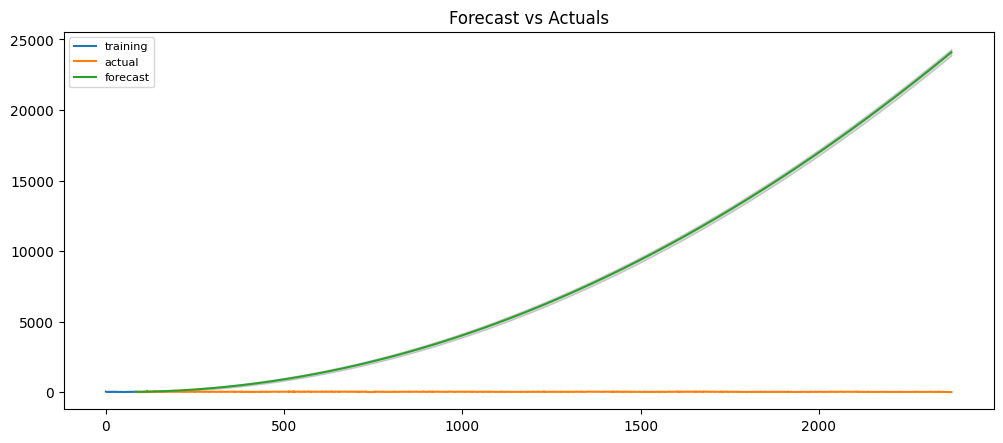

In [ ]:
# Maybe can be included

# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(2288, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: ignored

In [ ]:
!pip uninstall statsmodels

Found existing installation: statsmodels 0.12.2
Uninstalling statsmodels-0.12.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.12.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? n


In [ ]:
!pip install statsmodels

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip3 install pyramid-arima
!pip install pmdarima
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm



model = pm.auto_arima(Month_Count.Month, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series 12 in this case for the amount of months being tested
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-spjeha3o/pyramid-arima_e14b80c94e3f49e2b06818dcc8ec05cf/setup.py'"'"'; __file__='"'"'/tmp/pip-install-spjeha3o/pyramid-arima_e14b80c94e3f49e2b06818dcc8ec05cf/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-g32pluh8/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyramid-arima Check the logs for ful

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=16214.877, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22072.479, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=17220.929, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=20154.061, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=16175.401, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16781.156, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=16176.486, Time=1.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=16176.326, Time=1.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=16178.297, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16587.798, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=16179.007, Time=1.94 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16167.492, Time=3.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16198.546, Time=2.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=16391.414, Time=0.36 sec
 ARIMA(3,0,1)(0,0,0

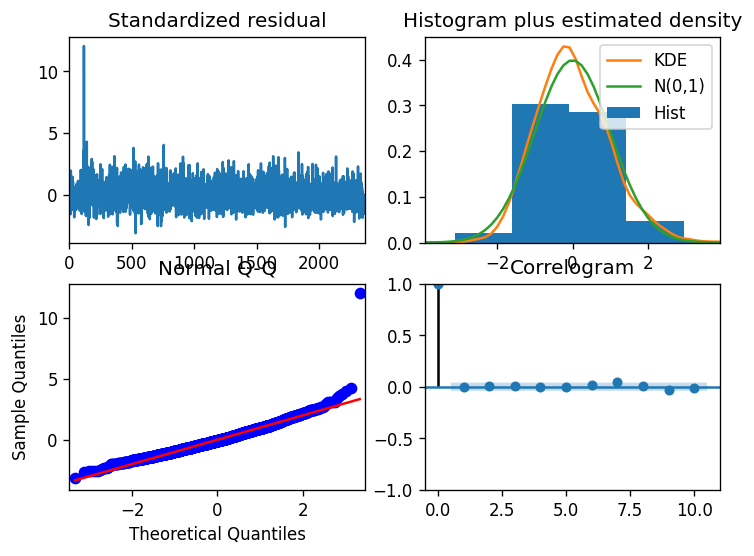

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

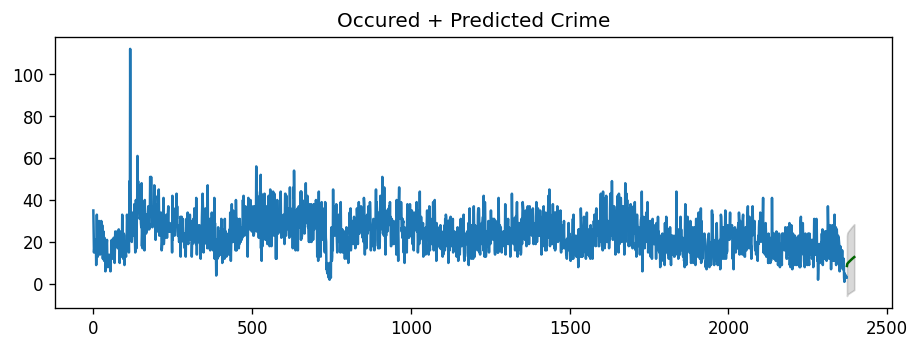

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(Month_Count.Month), len(Month_Count.Month)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(Month_Count.Month)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Occured + Predicted Crime")
plt.show()

In [ ]:
upper_series.head()

2373    22.856274
2374    24.146661
2375    24.508111
2376    24.748314
2377    24.968297
dtype: float64

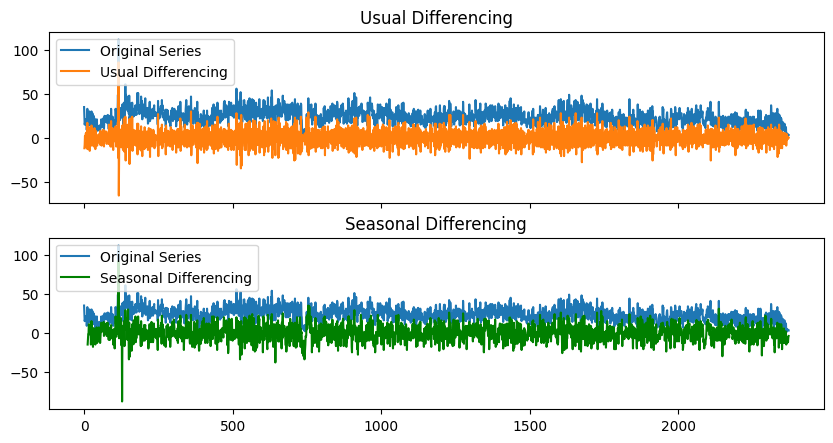

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(Month_Count.Month[:], label='Original Series')
axes[0].plot(Month_Count.Month[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(Month_Count.Month[:], label='Original Series')
axes[1].plot(Month_Count.Month[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)

plt.show()